C:\Users\chris\AppData\Local\Temp\ipykernel_5868\842651911.py:16: RuntimeWarning: divide by zero encountered in divide
  return  -(G*M) / r


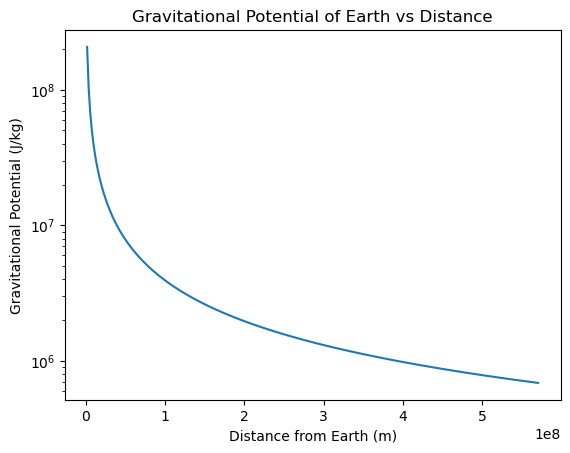

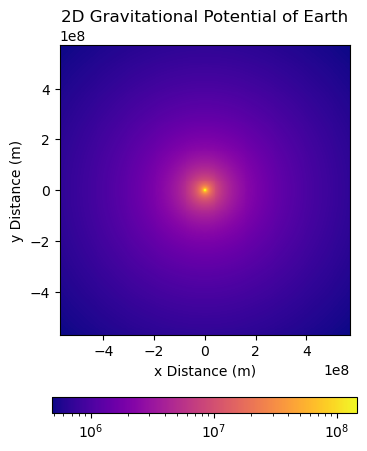

In [49]:
#Part One: Gravitational Potential of the Earth

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

G = (6.67 * 10**-11)
rad_E = 6378 * 10**3
dist_EM = 3.8 * 10**8
E_mass = 5.9 * 10**24

def grav_pot(M, xM, yM, x, y):
    r = np.sqrt((xM - x)**2 + (yM-y)**2)
    x = np.where(r == 0, np.nan, np.linspace(0, dist_EM*1.5, 300))
    y = np.where(r == 0, np.nan, np.linspace(0, dist_EM*1.5, 300))
    return  -(G*M) / r

fig1, ax1 = plt.subplots()
x = np.linspace(0, dist_EM*1.5, 300)
y = np.linspace(0, dist_EM*1.5, 300)

ax1.plot(x, np.abs(grav_pot(E_mass, 0,0,x,0)))
ax1.set_yscale('log')
ax1.set_xlabel('Distance from Earth (m)')
ax1.set_ylabel('Gravitational Potential (J/kg)')
ax1.set_title('Gravitational Potential of Earth vs Distance')


x2D = np.linspace(-dist_EM*1.5, dist_EM*1.5, 300)
y2D = np.linspace(-dist_EM*1.5, dist_EM*1.5, 300)
x_grid, y_grid = np.meshgrid(x2D,y2D)
z = np.abs(grav_pot(E_mass, 0, 0, x_grid, y_grid))

fig2, ax2 = plt.subplots()
mesh = ax2.pcolormesh(x_grid, y_grid, z, norm = LogNorm(), cmap = 'plasma')
ax2.set_aspect('equal')
cbar = fig2.colorbar(mesh, orientation = 'horizontal', shrink=.50)
ax2.set_xlabel('x Distance (m)')
ax2.set_ylabel('y Distance (m)')
ax2.set_title('2D Gravitational Potential of Earth')

plt.tight_layout()

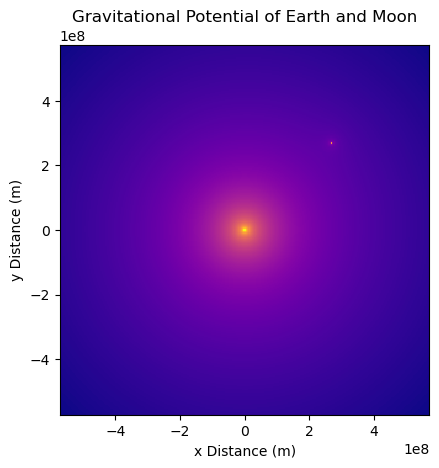

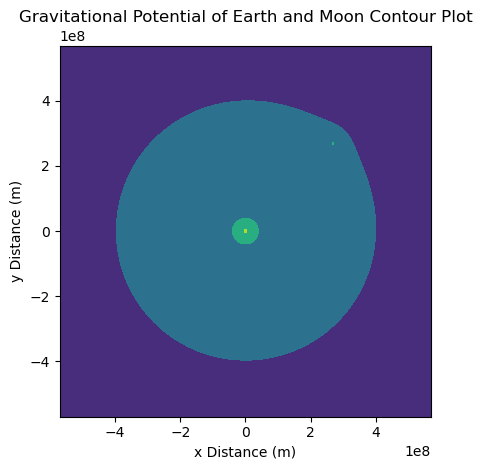

In [50]:
#Part Two: The Gravitational Potential of the Earth-Moon System
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

G = (6.67 * 10**-11)
rad_E = 6378 * 10**3
dist_EM = 3.8 * 10**8
E_mass = 5.9 * 10**24
M_mass = 7.3 * 10**22

mx= dist_EM / np.sqrt(2)
my = dist_EM / np.sqrt(2)

def grav_pot_EM(m1, m2, ex, ey, mx, my, x, y):
    re = np.sqrt((x - ex)**2 + (y - ey)**2)
    rm = np.sqrt((x - mx)**2 + (y - my)**2)
    re = np.where(re == 0, np.nan, re)
    rm = np.where(rm == 0, np.nan, rm)
    return - G * ((E_mass / re) + (M_mass / rm))

x = np.linspace(-1.5 * dist_EM, 1.5 * dist_EM, 300)
y = x

x_grid, y_grid = np.meshgrid(x, y)

z = np.abs(grav_pot_EM(E_mass, M_mass, 0, 0, mx, my, x_grid, y_grid))

fig1, ax1 = plt.subplots()
mesh = ax1.pcolormesh(x_grid, y_grid, z, norm = LogNorm(), cmap = 'plasma')
ax1.set_aspect('equal')
ax1.set_xlabel('x Distance (m)')
ax1.set_ylabel('y Distance (m)')
ax1.set_title('Gravitational Potential of Earth and Moon')

fig2, ax2 = plt.subplots()
contours = ax2.contourf(x_grid, y_grid, z, norm=LogNorm(), levels = 100)
ax2.set_aspect('equal')
ax2.set_xlabel('x Distance (m)')
ax2.set_ylabel('y Distance (m)')
ax2.set_title('Gravitational Potential of Earth and Moon Contour Plot')

plt.tight_layout()

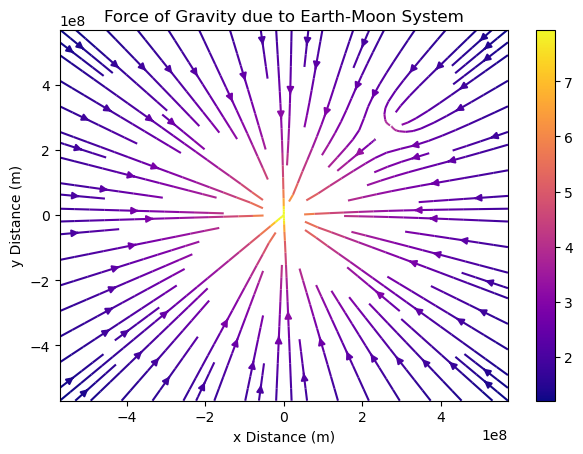

In [54]:
#Part Three: The Gravitational Force Field of the Earth-Moon System
import numpy as np
import matplotlib.pyplot as plt

G = 6.67 * 10**-11
rad_E = 6378 * 10**3
dist_EM = 3.8 * 10**8
E_mass = 5.9 * 10**24
M_mass = 7.3 * 10**22
A_mass = 5500

mx = dist_EM / np.sqrt(2)
my = dist_EM / np.sqrt(2)

def Force(m1, m2, x1, y1, x, y):
    rx = x1 - x
    ry = y1 - y
    r = np.sqrt((rx**2) + (ry**2))
    r = np.where( r == 0, np.nan, r)
    F_mag = G * m1 * m2 / r**2
    Fx = F_mag * (rx / r)
    Fy = F_mag * (ry / r)
    return Fx, Fy

x = np.linspace(-1.5 * dist_EM, 1.5 * dist_EM, 30)
y = x
x_grid, y_grid = np.meshgrid(x,y)

E_Fx, E_Fy = Force(E_mass, A_mass, 0, 0, x_grid, y_grid)
M_Fx, M_Fy = Force(M_mass, A_mass, mx, my, x_grid, y_grid)

fig, ax = plt.subplots()
strm = ax.streamplot(x_grid, y_grid, (E_Fx + M_Fx), (E_Fy + M_Fy), color = np.log(np.hypot(Fx, Fy)), cmap = 'plasma')
ax.set_xlabel('x Distance (m)')
ax.set_ylabel('y Distance (m)')
ax.set_title('Force of Gravity due to Earth-Moon System')

cbar = plt.colorbar(strm.lines)

plt.tight_layout()

In [51]:
#Part Four: Altitude of the Saturn V Rocket

import numpy as np
import scipy.integrate as spi

g = 9.81
Ve = 2.4 * 10**3
Mdot = 1.3 * 10**4
M0 = 2.8 * 10**6
Mf = 7.5 * 10**5

T = (M0 - Mf) / Mdot
print(f'Burn time T: {T} seconds\n')

def delta_V(t, M0, Mf, Mdot, Ve, g):
    Mt = M0 - Mdot * t
    dV = Ve * np.log(M0 / Mt) - g * t
    if Mt < Mf:
        return 0
    else:
        return dV

h = spi.quad(delta_V, 0, T, args=(M0, Mf, Mdot, Ve, g))
print(f'Altitude h: {h[0]} meters')

Burn time T: 157.69230769230768 seconds

Altitude h: 74093.98013366401 meters
